### Example 9 Multivariate logistic - l1 penalty

### 2.1 What to do?
In this example we demonstrate multivariate logistic regression with an L1 penalty (lasso).

Steps:
- Load the example data (`ex9.csv`).
- Build a binary target from `kidney_left_volume_R2` (values above its median = 1, otherwise 0).
- Use features `kidney_right_volume_R1`, `kidney_right_volume_R2`, and `kidney_left_volume_R1` (reported in ml). Exclude very small volumes (≤ 10 ml) and any NaN/None.
- Fit `statsmed.multivariate_logistic_lasso(...)` to obtain coefficients and predicted probabilities.
- Plot an ROC curve for the fitted model.

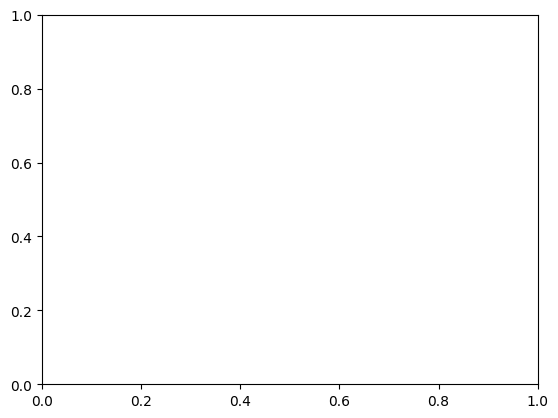

In [1]:
import pandas as pd
import numpy as np
from statsmed import statsmed
import matplotlib.pyplot as plt

data = pd.read_csv('ex9.csv', delimiter=',', on_bad_lines='skip')

new_data = data[['kidney_right_volume_R1','kidney_right_volume_R2','kidney_left_volume_R1','kidney_left_volume_R2']][
    (data['kidney_right_volume_R1'] > 10) &
    (data['kidney_right_volume_R2'] > 10) &
    (data['kidney_left_volume_R1'] > 10) &
    (data['kidney_left_volume_R2'] > 10)
]/1000

# Features and binary target
X_cols = ['kidney_right_volume_R1','kidney_right_volume_R2','kidney_left_volume_R1']
dd = [new_data[c] for c in X_cols]
tdd = (new_data['kidney_left_volume_R2'] > np.median(new_data['kidney_left_volume_R2'])).astype(int)


In [2]:
_, r_yte, r_proba = statsmed.multivariate_logistic_lasso(dd,tdd,columns=['kidney_right_volume_R1','kidney_right_volume_R2','kidney_left_volume_R1'],target_name='kidney_left_volume_R2',N_of_decimals = 2,quiet = False)

AUC: 0.997
                  feature      coef
0   kidney_left_volume_R1  5.767313
1  kidney_right_volume_R2  0.137469


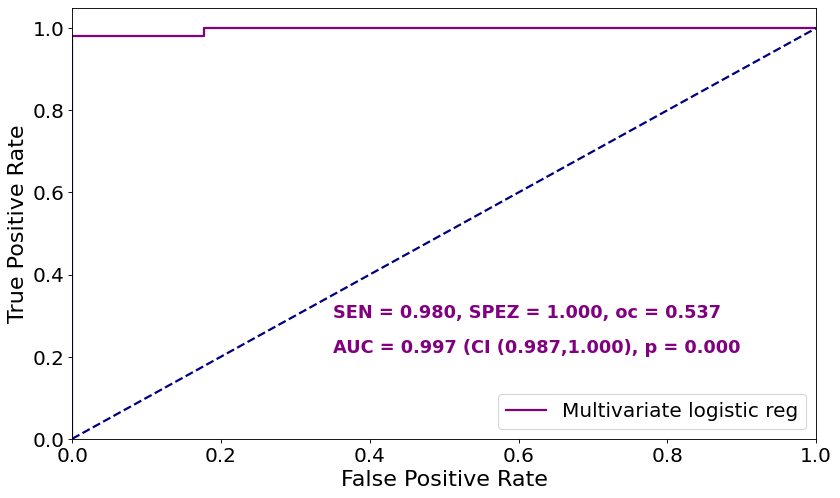

In [3]:
fig=plt.figure(figsize=(12, 7),dpi = 80)
fig.subplots_adjust(hspace = .3)
x1=fig.add_subplot(1,1,1)
statsmed.ROC_fig(r_yte,r_proba,1,nsamples=1000,label2='Multivariate logistic reg',x=x1,title='')

We trained a multivariate logistic regression with an L1 penalty (lasso) using three volumetric predictors and a binary target (above-median `kidney_left_volume_R2`). The printed table lists non-zero coefficients. The ROC figure summarizes discrimination performance with bootstrap confidence bands.

### 2.2 What to write?

- In Methods: “We trained an L1-penalized multivariate logistic regression using three volumetric predictors. The binary outcome was defined as values above the median of `kidney_left_volume_R2`.”
- In the ROC figure legend: “ROC curve with bootstrap confidence band for the lasso logistic model predicting above-median `kidney_left_volume_R2` from selected volumetric predictors.”